In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# Load data
df = pd.read_csv("insurance.csv")

In [3]:
# EDA
print(df.describe())
print(df.isnull().sum())  # Check missing values

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Check dimensions
print("\nDataset shape:", df.shape)


Dataset shape: (1338, 7)


In [6]:
# Data types and missing values
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [7]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq      

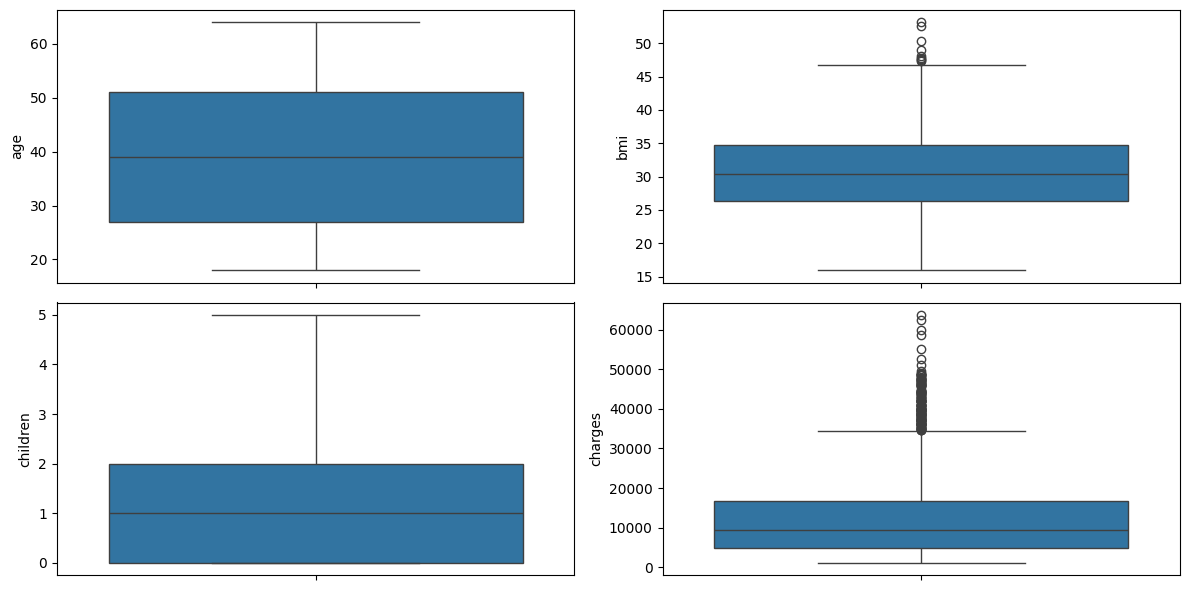

<Figure size 640x480 with 0 Axes>

In [8]:
# Boxplots for numerical features
numerical_cols = ['age', 'bmi', 'children', 'charges']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)
plt.tight_layout()
plt.show()
plt.savefig('BoxPlotNumerical_EDA1.png', format='png', dpi=300)

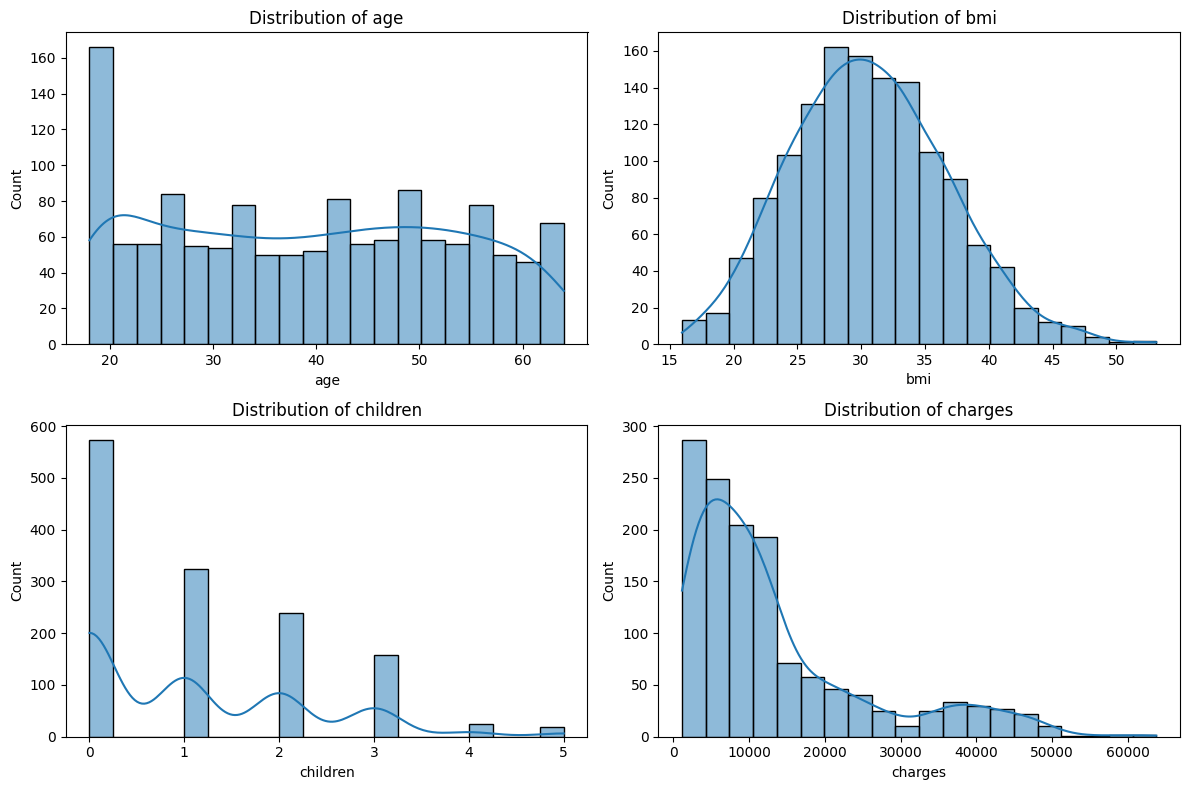


Skewness of charges: 1.5158796580240388
Log transformation may be needed for 'charges'.


In [9]:
# Histograms/KDE plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Check skewness of 'charges'
print("\nSkewness of charges:", df['charges'].skew())
if df['charges'].skew() > 1:
    print("Log transformation may be needed for 'charges'.")

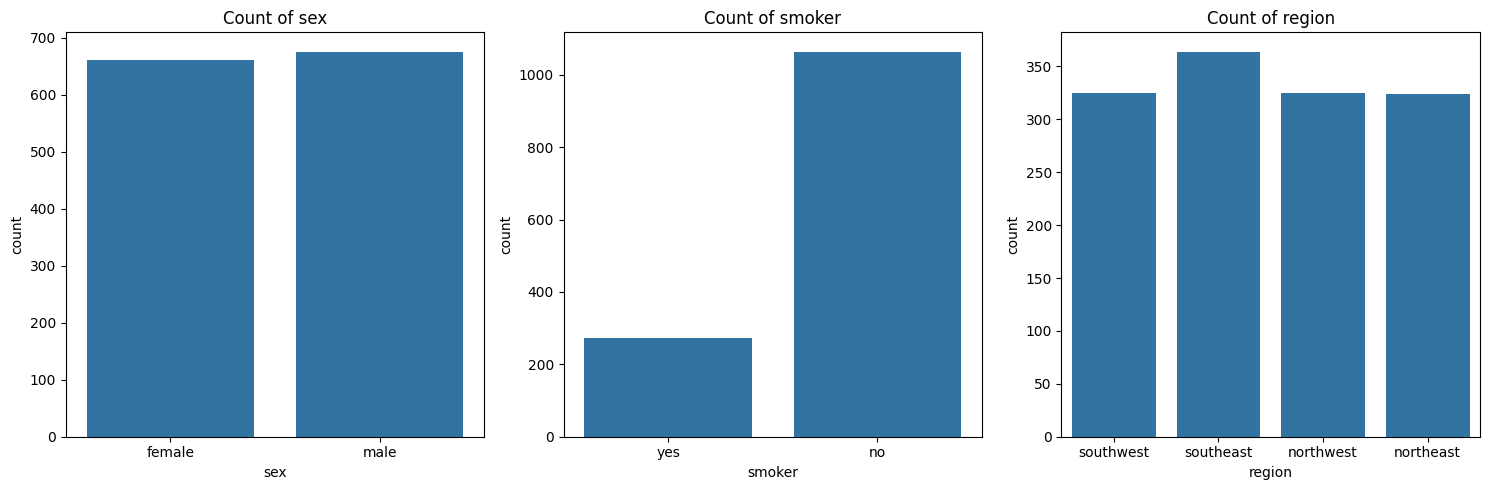

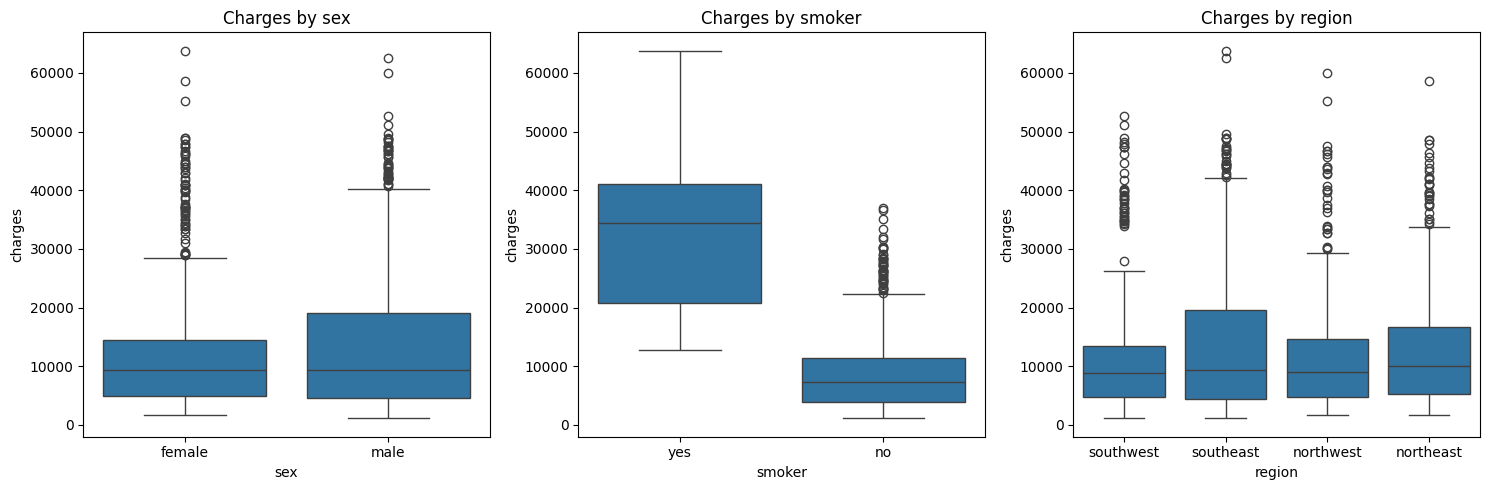

In [10]:
# Count plots for categorical features
categorical_cols = ['sex', 'smoker', 'region']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

# Charges by categorical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=col, y='charges')
    plt.title(f'Charges by {col}')
plt.tight_layout()
plt.show()

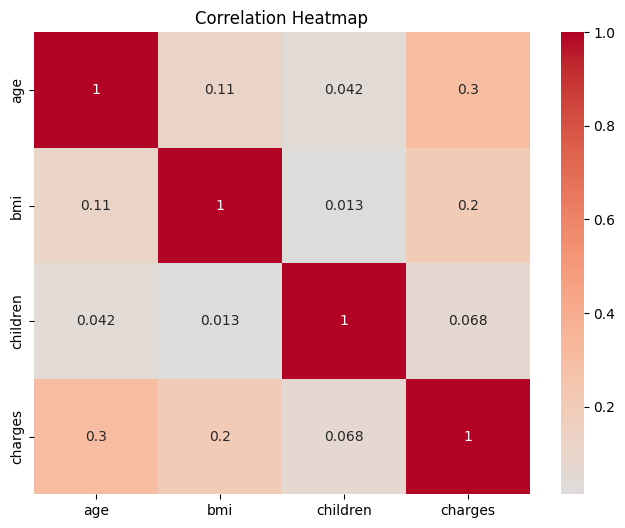

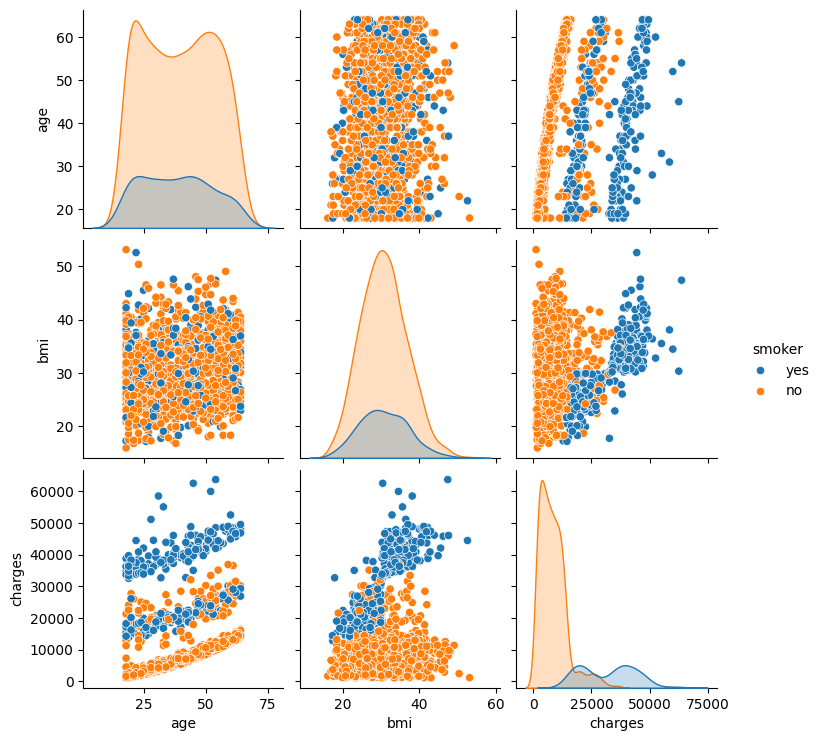

In [11]:
# Correlation heatmap (numerical features)
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots for key relationships
sns.pairplot(df[['age', 'bmi', 'charges', 'smoker']], hue='smoker')
plt.show()

In [12]:
# Print key observations
print("\nKey EDA Observations:")
print("- Missing values: None (complete dataset)")
print("- Outliers: Present in 'bmi' and 'charges' (right-skewed)")
print("- Skewness: 'charges' is highly right-skewed (skewness = {:.2f})".format(df['charges'].skew()))
print("- Smokers have significantly higher charges (visible in boxplots)")
print("- Weak correlation between 'age' and 'charges' (r = {:.2f})".format(corr_matrix.loc['age', 'charges']))


Key EDA Observations:
- Missing values: None (complete dataset)
- Outliers: Present in 'bmi' and 'charges' (right-skewed)
- Skewness: 'charges' is highly right-skewed (skewness = 1.52)
- Smokers have significantly higher charges (visible in boxplots)
- Weak correlation between 'age' and 'charges' (r = 0.30)


In [13]:
#Feature Selection: 
#1.) Selecting best features and training the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Load data (no dropping)
dfModel = pd.read_csv("insurance.csv")

dfModel['sex'] = dfModel['sex'].map({'female': 0, 'male': 1})
dfModel['smoker'] = dfModel['smoker'].map({'no': 0, 'yes': 1})

# Multi-category ('region') → label encode as integers
#df['region'] = df['region'].astype('category').cat.codes

print(dfModel.head())

# One-hot encode categorical variables
df_encoded = pd.get_dummies(dfModel, columns=['region'], drop_first=False)
df_encoded = df_encoded.astype(int)
print(df_encoded.head())
print(df_encoded.dtypes)

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520
   age  sex  bmi  children  smoker  charges  region_northeast  \
0   19    0   27         0       1    16884                 0   
1   18    1   33         1       0     1725                 0   
2   28    1   33         3       0     4449                 0   
3   33    1   22         0       0    21984                 0   
4   32    1   28         0       0     3866                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3    

In [16]:
# Define features (X) and target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']


In [17]:
# Split the data into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
print(y.head())
#print(y.head())

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64


In [19]:
#Selecting the Best Features

In [20]:

# Add intercept term (constant)
X_train_sm = sm.add_constant(X_train)

# Fit OLS model
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     333.8
Date:                Tue, 08 Apr 2025   Prob (F-statistic):          7.69e-267
Time:                        21:44:42   Log-Likelihood:                -9493.0
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     927   BIC:                         1.905e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.021e+04    952.731  

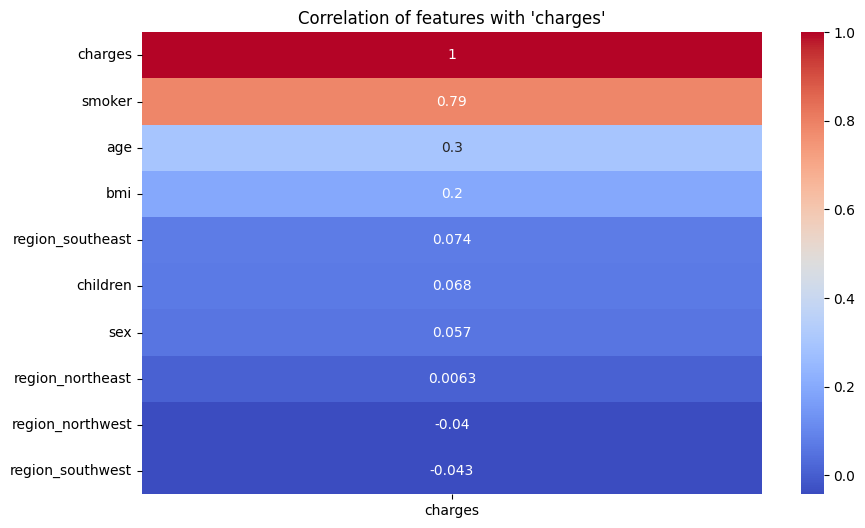

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get correlation matrix
corr = df_encoded.corr()

# Plot heatmap for correlation with 'charges'
plt.figure(figsize=(10, 6))
sns.heatmap(corr[['charges']].sort_values(by='charges', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of features with 'charges'")
plt.show()


In [22]:
#Backward Elimination - Feature Selection
# Add constant (intercept) to model
X_with_const = sm.add_constant(X)

# Initial full model
model = sm.OLS(y, X_with_const).fit()

# Loop for backward elimination
while True:
    p_values = model.pvalues.drop("const")  # exclude intercept
    max_pval = p_values.max()
    if max_pval > 0.05:
        worst_feature = p_values.idxmax()
        print(f"Removing '{worst_feature}' with p-value = {max_pval:.4f}")
        X_with_const = X_with_const.drop(columns=[worst_feature])
        model = sm.OLS(y, X_with_const).fit()
    else:
        break

print(model.summary())


Removing 'sex' with p-value = 0.6909
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.6
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:44:42   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
con

In [23]:
#Training model on The Chosen HyperParameters:
# 'age', 'bmi', 'children', 'smoker',
#'region_northeast', 'region_northwest', 'region_southeast',
#'region_southwest'


In [24]:

from sklearn.metrics import mean_squared_error, r2_score

# 1. Define the final set of features (excluding 'sex')
selected_features = ['age', 'bmi', 'children', 'smoker', 
                     'region_northeast', 'region_northwest', 
                     'region_southeast', 'region_southwest']

# 2. Add constant to test data
X_train_selected = sm.add_constant(X_train[selected_features])
X_test_selected = sm.add_constant(X_test[selected_features])

# 3. Fit OLS model on training data
ols_model = sm.OLS(y_train, X_train_selected).fit()

print(ols_model.summary())




                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     381.8
Date:                Tue, 08 Apr 2025   Prob (F-statistic):          3.94e-268
Time:                        21:44:42   Log-Likelihood:                -9493.1
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     928   BIC:                         1.904e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.017e+04    940.213  

In [25]:
# 4. Predict on test data
y_pred = ols_model.predict(X_test_selected)

In [26]:
#Evaluating The Model

In [27]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R-squared: {r2:.4f}")


Test RMSE: 5807.15
Test R-squared: 0.7700


In [28]:
#---------------------------EVALUATING MODEL CHECKS FOR NORMALITY, MULTI COLLIARITY, HETEROSCEDASTICITY----------------------

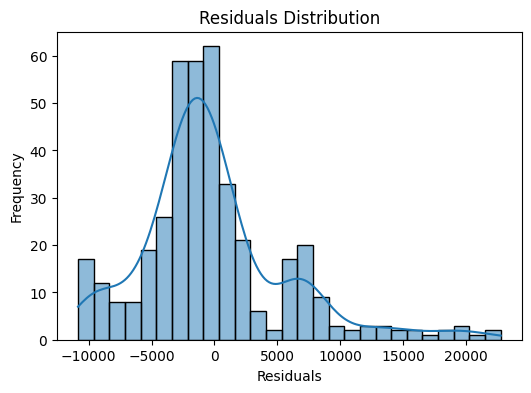

In [29]:

# Residuals
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()





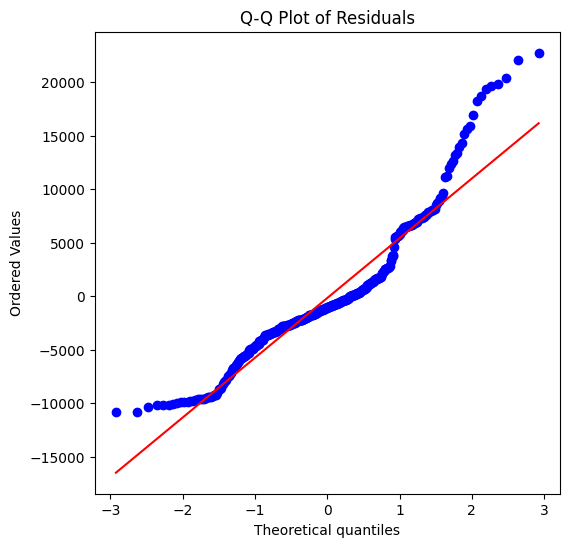

In [30]:
# Q-Q plot (check normality)
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

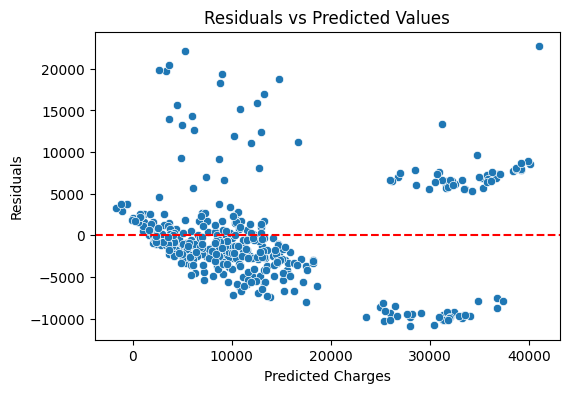

In [31]:
# Residuals vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.show()


In [32]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Test for heteroskedasticity
bp_test = het_breuschpagan(residuals, X_test_selected)
labels = ['LM Stat', 'LM p-value', 'F Stat', 'F p-value']

print(dict(zip(labels, bp_test)))


{'LM Stat': np.float64(37.56841275929665), 'LM p-value': np.float64(9.043878744339274e-06), 'F Stat': np.float64(5.802364615943422), 'F p-value': np.float64(2.0427314742710217e-06)}


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_selected.values, i) 
                   for i in range(X_train_selected.shape[1])]

print(vif_data)


            feature       VIF
0             const  0.000000
1               age  1.020005
2               bmi  1.100380
3          children  1.005878
4            smoker  1.005081
5  region_northeast       inf
6  region_northwest       inf
7  region_southeast       inf
8  region_southwest       inf


C:\Users\Dell E7450\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell E7450\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
